In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
df = pd.read_excel(r'C:\Users\ARGEN\Downloads\исходные данные.xlsx')

In [34]:
df = df.rename(columns={
    'дата': 'date',
    'сумма': 'amount',
    'основание (описание транзакции)': 'description',
    'реквизит получателя': 'details'
})

In [35]:
#Переводит колонку date в нужный нам тип данных для дальннейшего удобства
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

##### Делаем первичный осмотр данных
Смотрим какие типы транзакции бывают, выводим количество операции по каждому типу транзакий и т.д


In [43]:
df['description'].unique()

array(['покупка в магазине', 'покупка в аптеке', 'покупка на базаре',
       'снятие наличных', 'оплата коммунальных услуг',
       'поступление пенсии', 'подвязка к spotify', 'пополнение карты',
       'исходящий перевод (Мбанк)'], dtype=object)

In [40]:
df['description'].value_counts()

description
покупка в магазине           26
покупка в аптеке             20
покупка на базаре            14
пополнение карты             10
оплата коммунальных услуг     9
снятие наличных               8
исходящий перевод (Мбанк)     7
поступление пенсии            3
подвязка к spotify            1
Name: count, dtype: int64

In [45]:
df.groupby('description')['amount'].describe().sort_values(by='count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
description,,,,,,,,
покупка в магазине,26.0,735.269231,1105.085030,200.0,200.00,201.0,484.50,4000.0
покупка в аптеке,20.0,543.450000,606.119015,100.0,100.00,103.5,934.50,1500.0
покупка на базаре,14.0,484.714286,773.292603,200.0,200.00,200.0,210.75,3000.0
пополнение карты,10.0,17867.400000,4967.066991,11084.0,13708.75,17223.5,21506.00,24960.0
оплата коммунальных услуг,9.0,1422.555556,1094.111981,500.0,500.00,1063.0,2447.00,3000.0
снятие наличных,8.0,1928.125000,1554.869626,1000.0,1000.00,1178.0,2020.00,5393.0
исходящий перевод (Мбанк),7.0,25524.857143,19468.784480,12074.0,14871.00,19292.0,24659.00,68248.0
поступление пенсии,3.0,21666.666667,2886.751346,20000.0,20000.00,20000.0,22500.00,25000.0
подвязка к spotify,1.0,2000.000000,NaN,2000.0,2000.00,2000.0,2000.00,2000.0


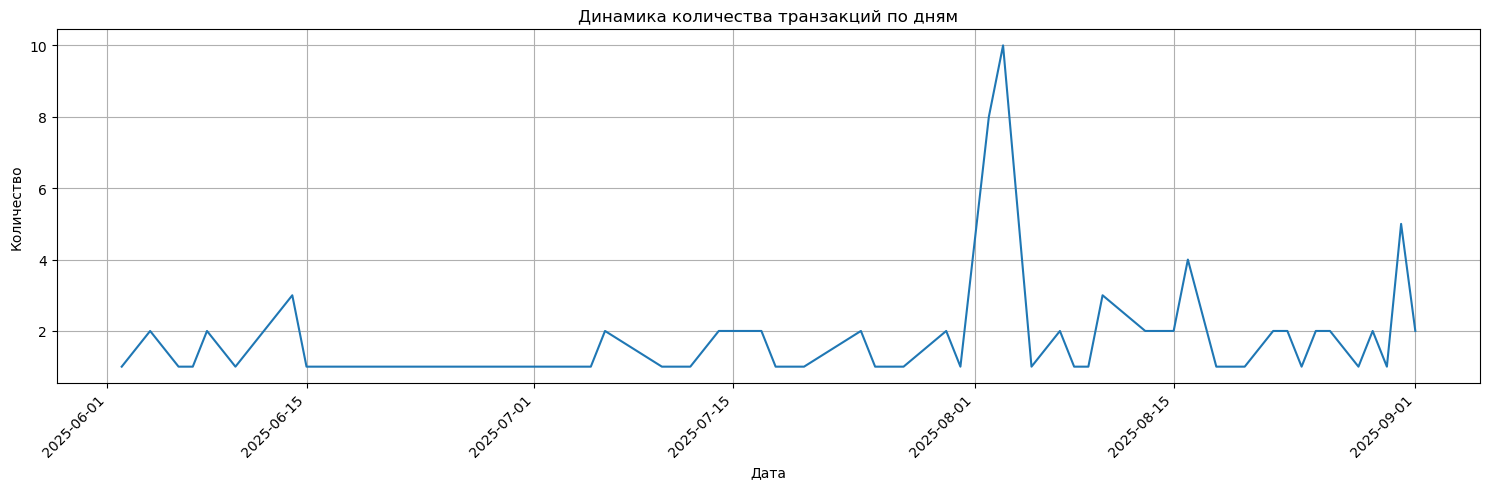

In [65]:
counts = df['date'].value_counts().sort_index()

plt.figure(figsize=(15, 5))
counts.plot(kind="line")
plt.title("Динамика количества транзакций по дням")
plt.xlabel("Дата")
plt.ylabel("Количество")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [51]:
df[df['date'].isin(pd.to_datetime(['2025-08-02', '2025-08-03']))]

,date,amount,description,details
40,2025-08-02,2000,подвязка к spotify,Базаркулов Адилет Советбекович
41,2025-08-02,24960,пополнение карты,Базаркулов Адилет Советбекович
42,2025-08-02,24358,пополнение карты,Базаркулов Адилет Советбекович
43,2025-08-02,21762,пополнение карты,Базаркулов Адилет Советбекович
44,2025-08-02,12074,исходящий перевод (Мбанк),996700123456
45,2025-08-02,15356,исходящий перевод (Мбанк),996700234567
46,2025-08-02,19292,исходящий перевод (Мбанк),996700345678
47,2025-08-02,24358,исходящий перевод (Мбанк),996700234567
48,2025-08-03,14386,пополнение карты,Базаркулов Адилет Советбекович
49,2025-08-03,11084,пополнение карты,Базаркулов Адилет Советбекович


In [73]:
#группируем данные по месяцам чтобы сделать сравнительный анализ
df.groupby(df['date'].dt.to_period('M'))['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
date,,,,,,,,
2025-06,20.0,2019.900000,4348.009356,100.0,221.00,873.0,1500.00,20000.0
2025-07,20.0,1980.100000,4472.176556,100.0,103.75,200.5,1775.50,20000.0
2025-08,56.0,7302.642857,12011.815149,100.0,200.00,883.5,13708.75,68248.0
2025-09,2.0,200.000000,0.000000,200.0,200.00,200.0,200.00,200.0
